In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
#downsizing our dataset for faster compilation from 500,000 to 500
df = df.head(500)
df.shape

(500, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##  Performing EDA on the dataset

Text(0.5, 0, 'Review stars')

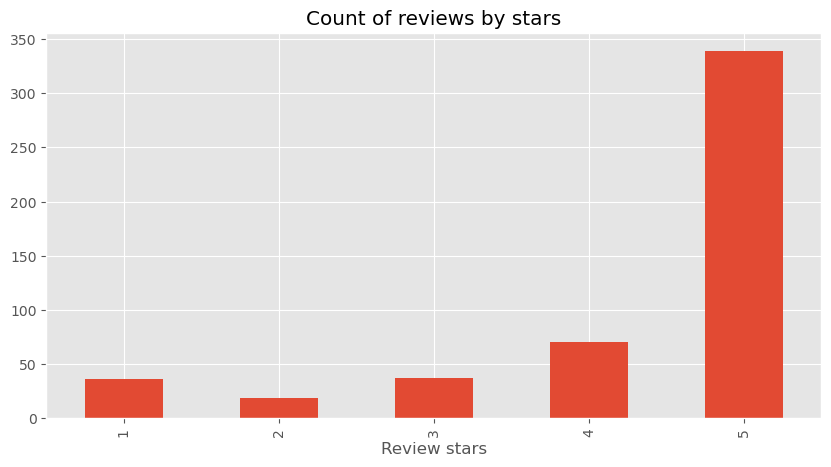

In [5]:
ax = df['Score'].value_counts().sort_index() \
   .plot(kind = 'bar', title = 'Count of reviews by stars', figsize =(10,5))

ax.set_xlabel('Review stars')

## performing basic NLTK

In [6]:
ex = df['Text'][50]
ex

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [7]:
tokens = nltk.word_tokenize(ex)
tokens[0:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]    |   Unz

True

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## using VADER approach
-> we'll use NLTK's SentimentIntensityAnalyzer to get the neutral,positive or negative score of the text

->we'll remove stopwords

->we'll assign a score to each word and then combine all the words in the text to get a score for a sentence

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores('I am excited today!')

{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4003}

here, the negative, neutral, positive are from 0 to 1
The compound is the aggregation of all 3 and ranges from -1 to +1

In [17]:
sia.polarity_scores('I am so sad today!')

{'neg': 0.551, 'neu': 0.449, 'pos': 0.0, 'compound': -0.5697}

In [18]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

## running the polarity score on our entire dataset


In [19]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

This way, we have the polarity scores of each text, associated with their respective ID and merge it with original dataset

In [21]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Asuming the star rating is directly proportional to compound polarity

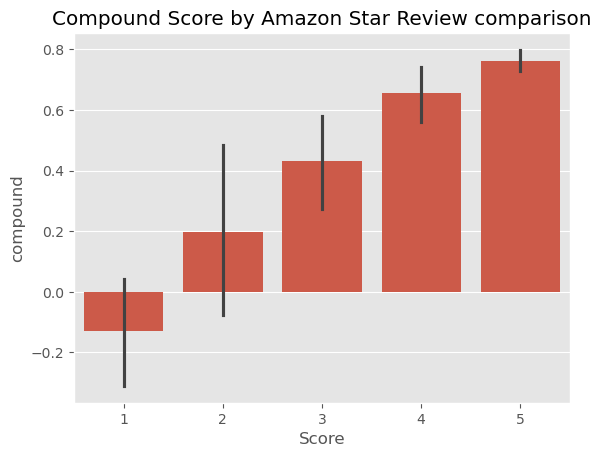

In [22]:
ax = sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review comparison')
plt.show()

We confirm, the more stars a review has, the more positive the compound is for that review text

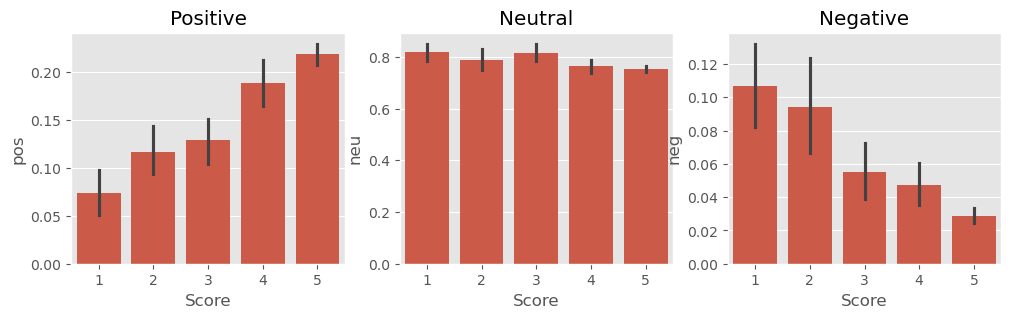

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data = vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data = vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data = vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

This shows direct relationship between positive polarity score of a text review and the stars it has, and negativity also has inverse proportionality relationship with stars

# Note that VADER model does not take into account the relation between words, which can be a neglect in terms of review analysis. Some reviews might be sarcastic and are actually positive, or they might be interpreted as positive , but are actually negative.

# For this purpose, we will be using a deep learning model from hugging face, named Roberta, which is a pretrained model and will be using it to perform our sentiment analysis

In [24]:
from transformers import AutoTokenizer

In [28]:
from transformers import AutoModelForSequenceClassification

In [29]:
from scipy.special import softmax

In [25]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [30]:
import torch

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\acer\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\acer\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\acer\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [34]:
print(ex)
sia.polarity_scores(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [39]:
# Running for RoBerta
encoded_text=tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)#This is a tensor, so we'll convert it into numpy so we can store it

scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
                }
scores_dict

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687465,
 'roberta_pos': 0.0029573692}

The Roberta model predicts that our example text is very negative(much more than what VADERS model predicted) which is accurate.

 ## Well now run this on our whole dataset

In [57]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)#This is a tensor, so we'll convert it into numpy so we can store it
    
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
                    }
    return scores_dict

In [58]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:#this will work in case of reviews that are too big for th emodel to handle
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id83
Broke for id187


In [59]:
results_df = pd.DataFrame(res).T# converting the resultant into a dataframe and merging to original dataset
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [60]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Comparing the performance of models

In [61]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

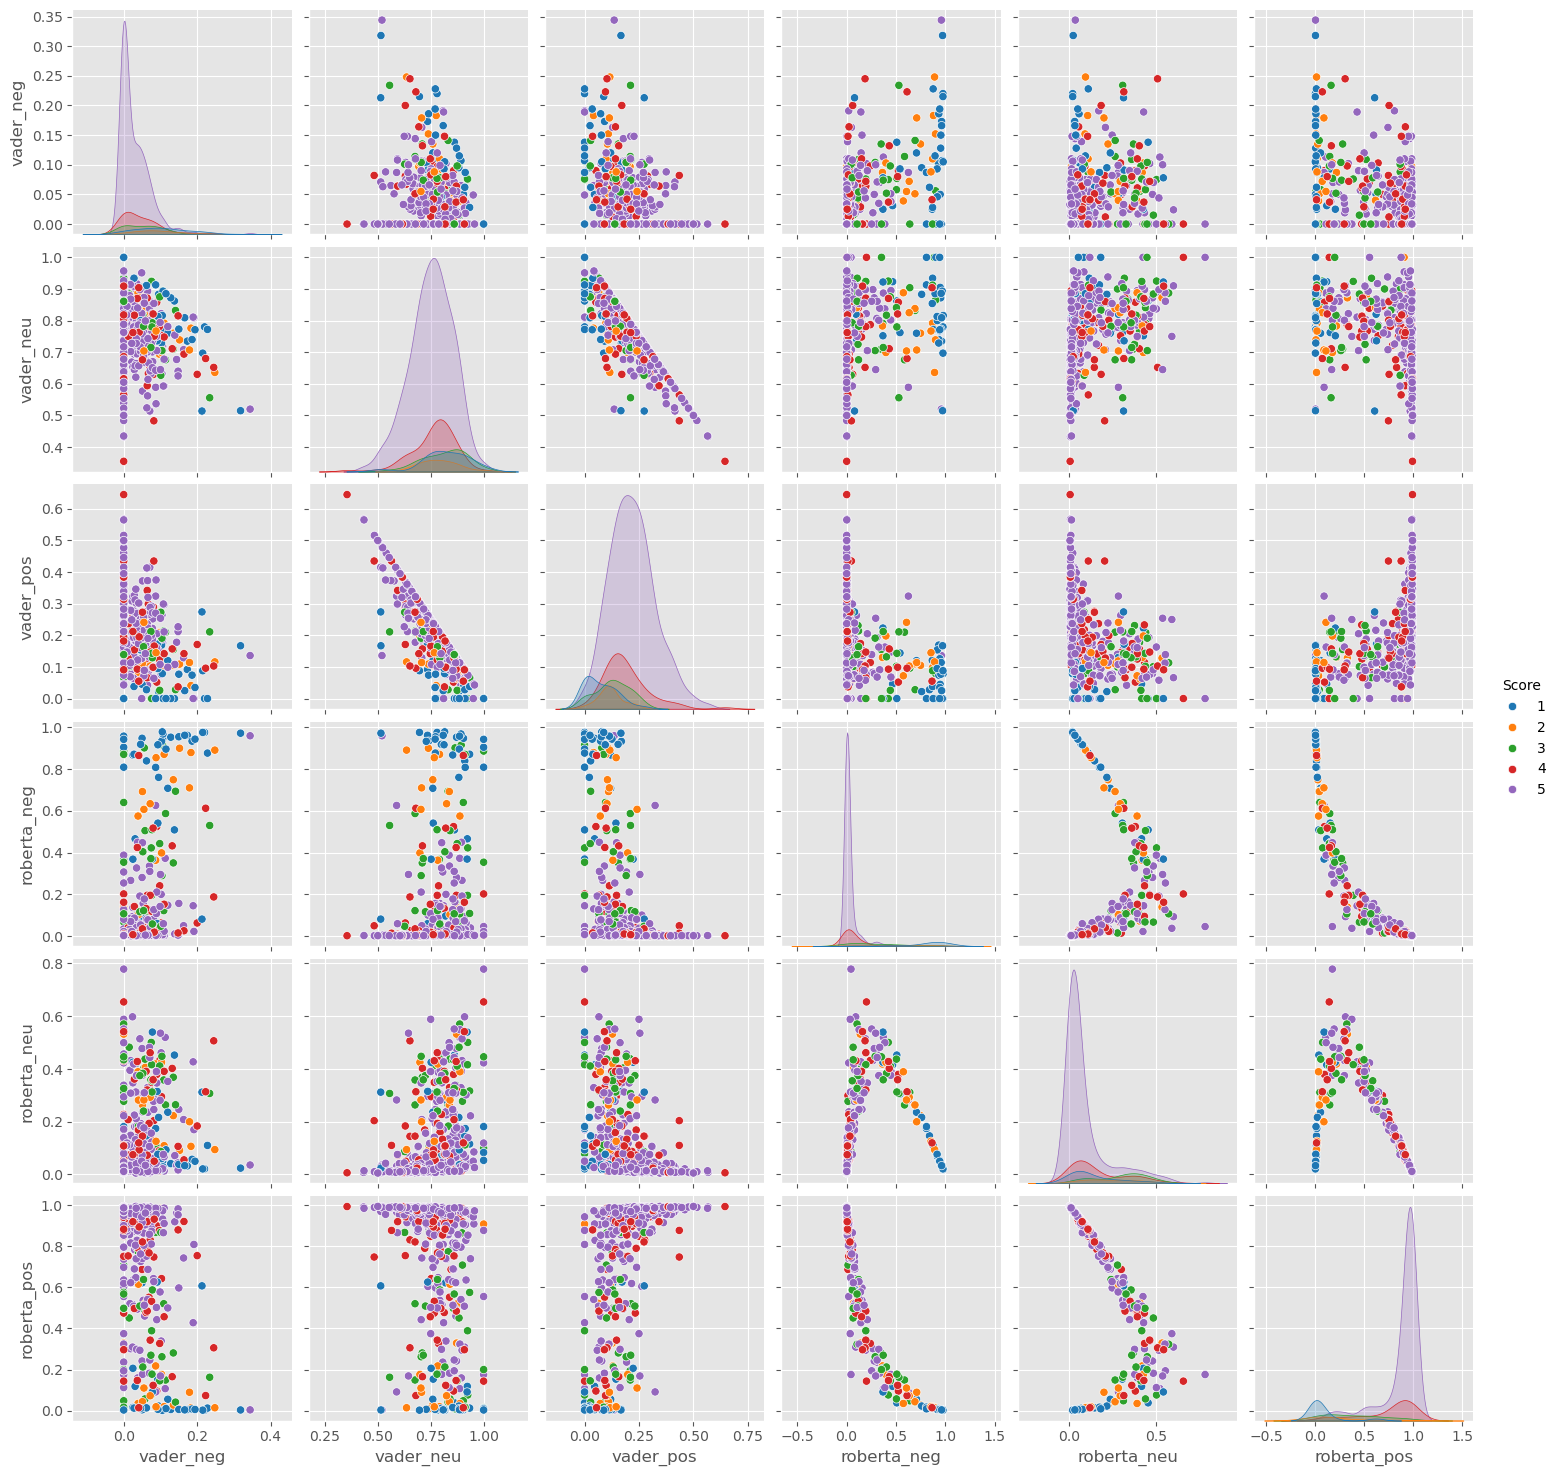

In [62]:
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue ='Score',
            palette='tab10')
plt.show()

## Let's see instances where the model might not perform as expected

In [63]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending = False)['Text'].values[0]# gets highest positive review with rating 1

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

### This sentence is predicted to be positive by our roberta model, however, it is actually a 1 star review.

In [64]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending = False)['Text'].values[0]# gets highest positive review with rating 1

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

### Vader model is also confusing this model as positive whereas, it is a negative review of 1 star rating

## Checking contradctions for negative 5 star reviews

In [65]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending = False)['Text'].values[0]# gets highest negative review with rating 5

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### This is a positive review, however, it's predicted as a negative one by RoBerta model

In [67]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending = False)['Text'].values[0]# gets highest negative review with rating 5

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### The same sentence confuses the VADER model as well

# Using Transformers pipeline 

### Using transformers pipeline, we are able to use their default model to perform sentiment analysis

In [69]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\acer\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\acer\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\acer\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [70]:
sent_pipeline('I loved the quality of this product, so much that i consumed a lot of it and gained weight, my bad!')

[{'label': 'POSITIVE', 'score': 0.9944133162498474}]

In [71]:
sent_pipeline('This product was so good for only 5 minutes. I should have used my cheap coffee instead')

[{'label': 'NEGATIVE', 'score': 0.9991318583488464}]

[{'label': 'POSITIVE', 'score': 0.9998207688331604}]